In [45]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Load the Dataset
- Load the dataset
- Check for any null values, check the types, etc.
- Encode the labels for binary classification

In [46]:
df = pd.read_csv(filepath_or_buffer='./Citrus_Data.csv')

df.head(10)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
5,orange,4.59,95.86,142,100,2
6,orange,4.64,97.94,156,85,2
7,orange,4.65,98.50,142,74,2
8,orange,4.68,100.20,159,90,16
9,orange,4.69,100.31,161,76,6


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [48]:
ORANGE = 0
GRAPEFRUIT = 1

def encode_labels(string_label: str) -> int:
    return 0 if string_label == 'orange' else 1

df['name'] = df['name'].apply(encode_labels)

In [49]:
df.head(100)

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
95,0,5.77,114.30,163,76,2
96,0,5.79,114.31,150,90,2
97,0,5.79,114.39,144,73,2
98,0,5.80,114.44,139,105,2


In [50]:
df.tail(100)

,name,diameter,weight,red,green,blue
9900,1,13.99,237.05,151,90,2
9901,1,14.00,237.05,160,66,24
9902,1,14.01,237.23,163,74,3
9903,1,14.03,237.25,159,71,35
9904,1,14.03,237.42,170,70,24
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


# Feature Scaling and Splitting the data
- Perform some feature scaling
- Split the data

In [51]:
X_data = df.drop('name', axis=1).copy()
X_data = StandardScaler().fit_transform(X_data)
y_data = df['name'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=20)

# Quick Data Exploration

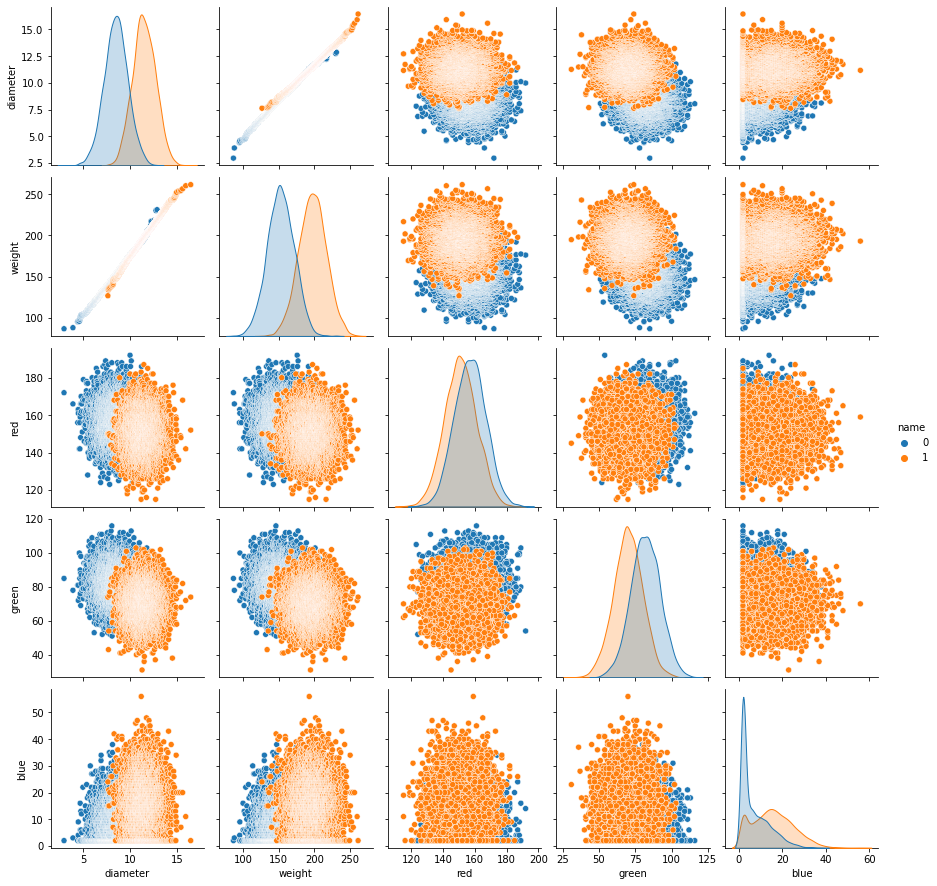

In [52]:
sns.pairplot(data=df, hue='name')
plt.show()

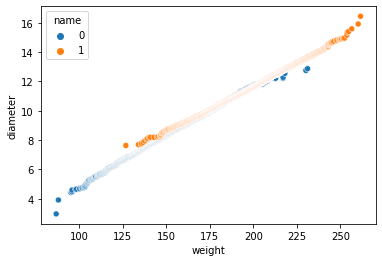

In [53]:
sns.scatterplot(x="weight", y="diameter",
                hue="name",
                data=df)
plt.show()

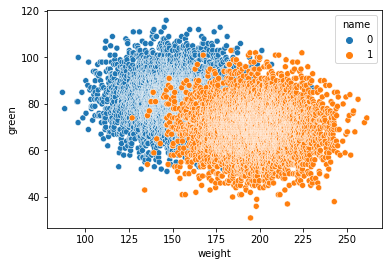

In [54]:
sns.scatterplot(x="weight", y="green",
                hue="name",
                data=df)
plt.show()

In [55]:
# Fitting the model, for more intuition on the math check out my post on the Derivation of Gradient Descent for Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Making Predictions
y_pred = lr_model.predict(X_train)
print("Prediction on training set:", y_pred)

Prediction on training set: [0 1 0 ... 1 1 0]


In [63]:
# Checking Accuracy
print("Accuracy on testing set:", lr_model.score(X_test, y_test))

Accuracy on testing set: 0.943
